In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [18]:
x_train=pd.read_csv(r"C:\Users\DELL\Downloads\Logistic_X_Train.csv")
y_train=pd.read_csv(r"C:\Users\DELL\Downloads\Logistic_y_Train.csv")
x_test=pd.read_csv(r"C:\Users\DELL\Downloads\Logistic_X_Test.csv")
print(x_train,x_train.shape,type(x_train),y_train,y_train.shape,type(y_train),x_test,x_test.shape,type(x_test))

            f1        f2        f3
0    -1.239375  0.749101 -0.528515
1    -1.036070  0.801436 -1.283712
2    -0.615579  1.579521 -1.391927
3     1.335978  1.348651  1.433564
4     0.658925  1.300019  0.571603
...        ...       ...       ...
2995 -0.455628  1.302303 -1.338027
2996 -0.434551  1.597813 -1.748643
2997  0.088277  1.638789 -2.193641
2998  1.525155  0.859234  1.505308
2999 -0.979817  0.563954 -1.539394

[3000 rows x 3 columns] (3000, 3) <class 'pandas.core.frame.DataFrame'>       label
0         1
1         1
2         1
3         0
4         0
...     ...
2995      1
2996      1
2997      1
2998      0
2999      1

[3000 rows x 1 columns] (3000, 1) <class 'pandas.core.frame.DataFrame'>            f1        f2        f3
0   -0.767508 -0.261859 -2.514831
1   -1.241653  1.449001 -0.413089
2    1.925270  1.931761  1.342619
3   -1.298255  1.049761 -0.527319
4   -0.964712  0.938088 -1.186328
..        ...       ...       ...
995  2.877461  3.043965  2.308939
996  3.128835  3.1

In [36]:
class_0=x_train.loc[(y_train['label']==0)]
class_1=x_train.loc[(y_train['label']==1)]

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
coeff=model.coef_
intercept=model.intercept_
print(coeff,intercept)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-3.92798396  3.10147056 -2.28040541]] [-4.27017148]


In [104]:
output=model.predict(x_test)
class0_prediction=x_test.loc[(output==0)]
class1_prediction=x_test.loc[(output==1)]
df=pd.DataFrame(output)
print(' classification of chemicals is:')
df

 classification of chemicals is:


,0
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


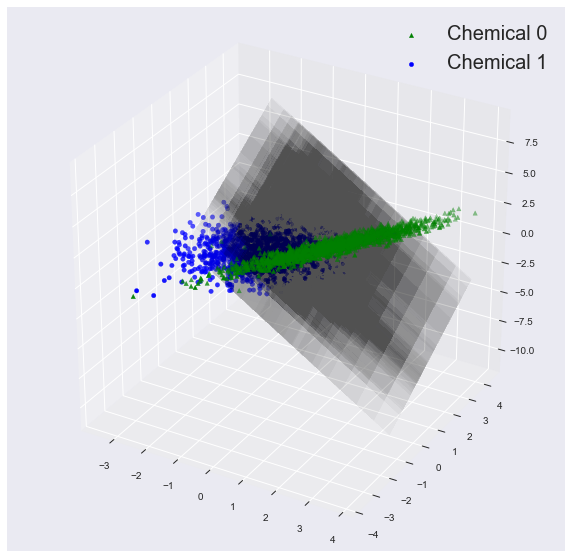

In [103]:
#visualization of the model
fig = plt.figure(figsize=(10,10))
axs=plt.axes(projection='3d')
axs.scatter3D(class_0['f1'],class_0['f2'],class_0['f3'],label='Chemical 0',color='green',marker='^')
axs.scatter3D(class_1['f1'],class_1['f2'],class_1['f3'],label='Chemical 1',color='blue')
x=x_test['f1']
y=x_test['f2']
axs.plot_surface(xx,yy,z,alpha=0.01,color='gray')
axs.legend(fontsize=20)


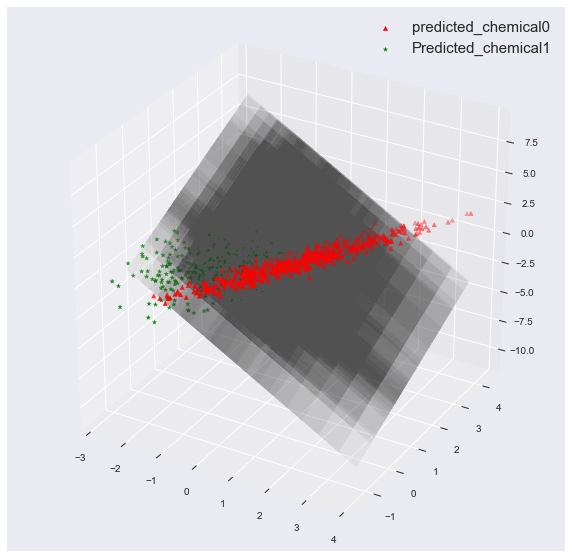

In [102]:
fig = plt.figure(figsize=(10,10))
axs=plt.axes(projection='3d')
xx, yy = np.meshgrid(x, y)
z=-((coeff[0][1]*yy+coeff[0][0]*xx+intercept)/coeff[0][2])
axs.plot_surface(xx,yy,z,alpha=0.02,color='gray')
axs.scatter3D(class0_prediction['f1'],class0_prediction['f2'],class0_prediction['f3'],marker='^',label='predicted_chemical0',color='red')
axs.scatter3D(class1_prediction['f1'],class1_prediction['f2'],class1_prediction['f3'],marker='*',label='Predicted_chemical1',color='green')
axs.legend(fontsize=15)

In [59]:
#Accuracy
print('The accuracy of the model is',model.score(x_train,y_train))

The accuracy of the model is 0.9953333333333333
